In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
def pose_estimation(frame, aruco_dict_type, matrix_coefficients, distortion_coefficients):

	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	arucoDict=cv2.aruco.Dictionary_get(aruco_dict_type)
	arucoParams=cv2.aruco.DetectorParameters_create()
	corners, ids, rejected_img_points=cv2.aruco.detectMarkers(gray,arucoDict,parameters=arucoParams);print(corners)


	if len(corners) > 0:
		for i in range(0, len(ids)):
			rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[i], 50, matrix_coefficients,distortion_coefficients)
			cv2.aruco.drawDetectedMarkers(frame, corners)
			cv2.drawFrameAxes(frame, matrix_coefficients, distortion_coefficients, rvec, tvec, 5)
			print(tvec)
	return frame, corners

In [3]:
def markers(s):
  img = cv2.imread(s)
  h,w,_=img.shape
  width=1000
  height=int(width*(h/w))
  img=cv2.resize(img,(width,height),interpolation=cv2.INTER_CUBIC)
  # corners,ids,rejected=cv2.aruco.detectMarkers(img,arucoDict,parameters=arucoParams)
  mtx = np.array([[560.26831365, 0.,651.26205498],[0.,561.31870941,499.05498086],[0.,0.,1.]])
  dist = np.array([[-2.32876385e-01,  6.16788766e-02, -1.40234765e-05,3.81911252e-05, -7.54075162e-03]])

  detected_markers, corners=pose_estimation(img,cv2.aruco.DICT_4X4_50,mtx,dist)
  xc=(corners[0][0][0][0]+corners[0][0][1][0]+corners[0][0][2][0]+corners[0][0][3][0])/4
  yc=(corners[0][0][0][1]+corners[0][0][1][1]+corners[0][0][2][1]+corners[0][0][3][1])/4

  print(f"Center: ({xc},{yc})")

  cv2_imshow(detected_markers)

(array([[[393.,  37.],
        [422., 214.],
        [229., 243.],
        [206.,  61.]]], dtype=float32),)
[[[-85.83878118 -92.39821877 111.81687835]]]
Center: (312.5,138.75)


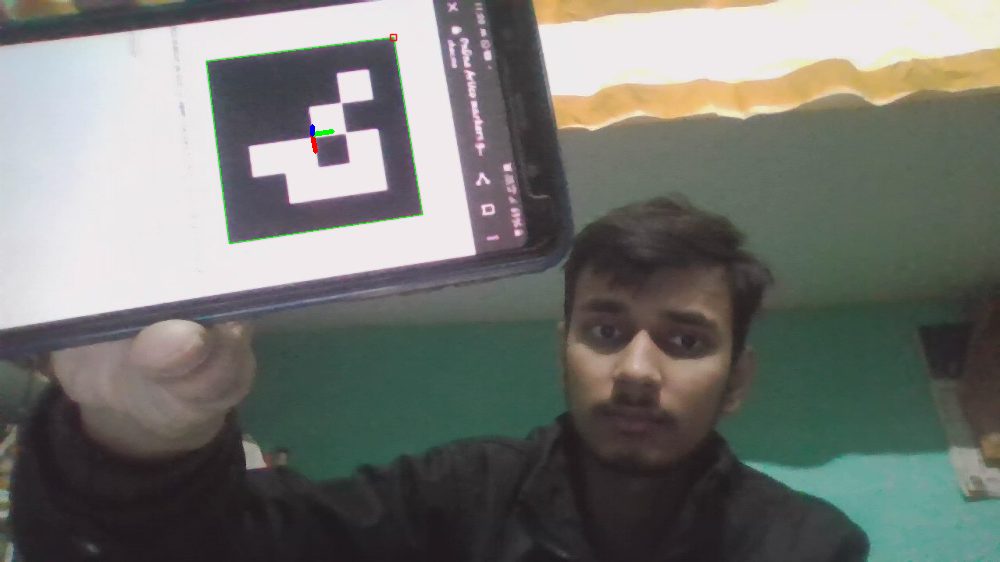

In [4]:
markers(r'/content/WIN_20231229_11_00_44_Pro.jpg')